# Advanced: Parameter Latex Representation

## Setup

Let's first make sure we have the latest version of PHOEBE 2.3 installed (uncomment this line if running in an online notebook session such as colab).

In [ ]:
#!pip install -I "phoebe>=2.3,<2.4"

In [2]:
import phoebe
from phoebe import u # units
import numpy as np

logger = phoebe.logger()

The latex representations of parameters are mostly used while plotting [distributions](./distributions.ipynb)... so let's just create a few dummy distributions so that we can see how they're labeled when plotting.

In [4]:
b = phoebe.default_binary()
b.add_distribution({'teff@primary': phoebe.gaussian_around(100),
                    'teff@secondary': phoebe.gaussian_around(150),
                    'requiv@primary': phoebe.uniform_around(0.2)})

<ParameterSet: 3 parameters | components: secondary, primary>

## Default Representation

By default, whenever parameters themselves are referenced in plotting (like when calling [b.plot_distribution_collection](../api/phoebe.frontend.bundle.Bundle.plot_distribution_collection.md), a latex representation of the parameter name, along with the component or dataset, when applicable, is used.

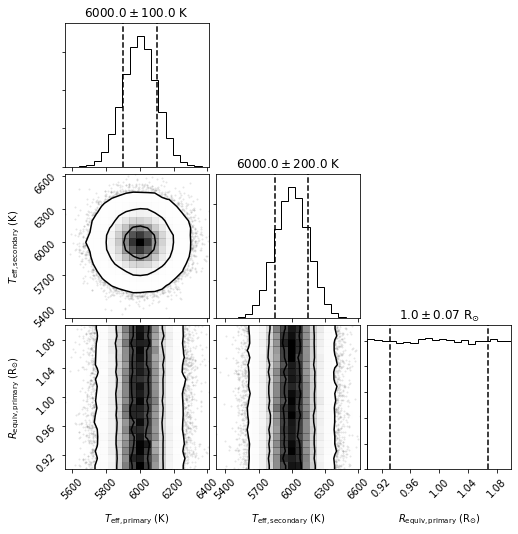

In [5]:
_ = b.plot_distribution_collection(show=True)

## Overriding Component Labels

By default, the component labels themselves are used within this latex representation.  These labels can be changed internally with [b.rename_component](../api/phoebe.frontend.bundle.Bundle.rename_component.md).  However, sometimes it is convenient to use a different naming convention for the latex representation.

For example, let's say that we wanted to keep the python-labels as-is ('primary', 'secondary', and 'binary'), but use 'A', 'B', and 'AB' in the latex representations, respectively.  These latex-representations are stored in the `latex_repr` parameters. 

In [7]:
print(b.filter(qualifier='latex_repr'))

ParameterSet: 3 parameters
        latex_repr@primary@figure: 
      latex_repr@secondary@figure: 
         latex_repr@binary@figure: 


These are blank (empty string) by default, in which case the actual component labels are used while plotting.

In [8]:
print(b.components)

['primary', 'secondary', 'binary']


If we set these, then the `latex_repr` parameters will take precedence over the component labels

In [9]:
b.set_value(qualifier='latex_repr', component='primary', value='A')
b.set_value(qualifier='latex_repr', component='secondary', value='B')
b.set_value(qualifier='latex_repr', component='binary', value='AB')

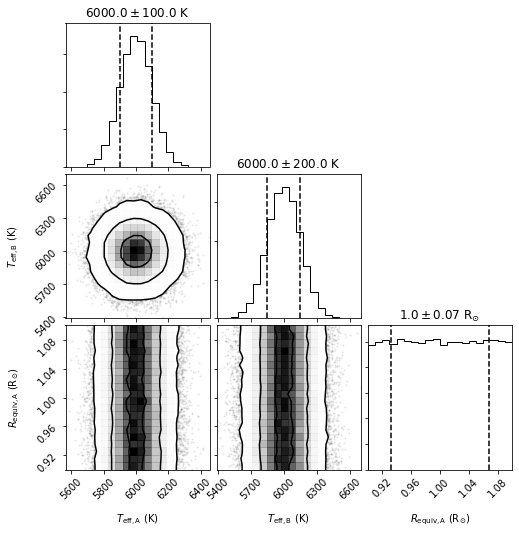

In [10]:
_ = b.plot_distribution_collection(show=True)

## Overriding Parameter Latex "Templates"

Internally each parameter has a "template" for how to represent its name in latex.  Let's look at those attributes for the parameters we have been plotting here.

In [12]:
b.get_parameter(qualifier='teff', component='primary', context='component')

<Parameter: teff=6000.0 K | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, readonly, advanced, latexfmt>

In [14]:
print(b.get_parameter(qualifier='teff', component='primary', context='component').latexfmt)

T_{{ \mathrm{{ eff }}, \mathrm{{ {component} }} }}


When plotting, the `{component}` portion of this string is replaced with `latex_repr` (if not empty) and otherwise the component label itself.  Changing this template isn't *technically* supported (since there are no checks to make sure the string is valid), but if you insist, you can change the underlying string as follows::

In [17]:
b.get_parameter(qualifier='teff', component='primary', context='component')._latexfmt = 'T_{{ \mathrm{{ {component} }}}}'

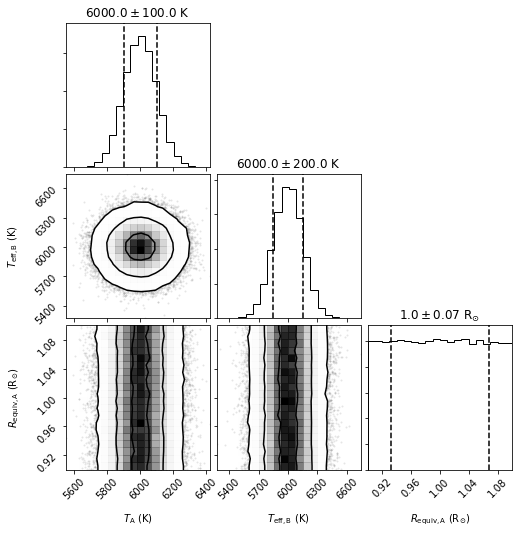

In [18]:
_ = b.plot_distribution_collection(show=True)